In [83]:
import pandas as pd
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

#### [CONFUSION TABLE: Compare average validation & test performance for all 3 models]

In [84]:
df_xgb_confusion_table = pd.read_csv(
    'Data/Data_visualization_folders/modelling_results/xgb_results.csv', index_col=0)
df_rfc_confusion_table = pd.read_csv(
    'Data/Data_visualization_folders/modelling_results/rfc_results.csv', index_col=0)
df_dt_confusion_table = pd.read_csv(
    'Data/Data_visualization_folders/modelling_results/dt_results.csv', index_col=0)

In [85]:
df_xgb_confusion_table.describe(include='all')

,Metrics,XGBoost Results
count,10,10.000000
unique,10,NaN
top,Test Recall,NaN
freq,1,NaN
mean,NaN,0.870740
std,NaN,0.078979
min,NaN,0.711597
25%,NaN,0.888793
50%,NaN,0.898551
75%,NaN,0.906541


In [86]:
df_rfc_confusion_table.describe(include='all')

,Metrics,Random Forest Results
count,10,10.000000
unique,10,NaN
top,Test Recall,NaN
freq,1,NaN
mean,NaN,0.868543
std,NaN,0.069143
min,NaN,0.731342
25%,NaN,0.884022
50%,NaN,0.890178
75%,NaN,0.900660


In [87]:
df_dt_confusion_table.describe(include='all')

,Metrics,Decision Tree Results
count,10,10.000000
unique,10,NaN
top,Test Recall,NaN
freq,1,NaN
mean,NaN,0.761402
std,NaN,0.067234
min,NaN,0.642797
25%,NaN,0.741893
50%,NaN,0.770160
75%,NaN,0.800449


In [88]:
df_full_confusion_table = pd.concat([df_xgb_confusion_table.set_index('Metrics'),
                                     df_rfc_confusion_table.set_index('Metrics'),
                                     df_dt_confusion_table.set_index('Metrics')], axis=1, sort=False)

In [89]:
df_full_confusion_table.reset_index()

,Metrics,XGBoost Results,Random Forest Results,Decision Tree Results
0,Average Validation Balanced Accuracy,0.740494,0.754283,0.665245
1,Average Validation Precision,0.888365,0.884022,0.815683
2,Average Validation Recall,0.896584,0.884558,0.775894
3,Average Validation F1,0.890078,0.884023,0.791499
4,Average Validation ROC-AUC (One vs Rest) score,0.957780,0.949689,0.750004
5,Test Balanced Accuracy,0.711597,0.731342,0.642797
6,Test Precision,0.900517,0.901839,0.865848
7,Test Recall,0.910364,0.895798,0.764426
8,Test F1,0.904353,0.898488,0.803432
9,Test ROC-AUC (One vs Rest) score,0.907270,0.901384,0.739189


In [90]:
df_full_confusion_table.index

Index(['Average Validation Balanced Accuracy', 'Average Validation Precision',
       'Average Validation Recall', 'Average Validation F1',
       'Average Validation ROC-AUC (One vs Rest) score',
       'Test Balanced Accuracy', 'Test Precision', 'Test Recall', 'Test F1',
       'Test ROC-AUC (One vs Rest) score'],
      dtype='object', name='Metrics')

In [91]:
# File Output
three_results_file_name = 'all_three_model_results.csv'
three_results_file_path = 'Data/Data_visualization_folders/modelling_results/' + \
    three_results_file_name
if os.path.exists(three_results_file_name):
    os.remove(three_results_file_name)
    df_full_confusion_table.to_csv(three_results_file_path, index=True)
else:
    df_full_confusion_table.to_csv(three_results_file_path, index=True)

#### [XGBoost - MAP (HEATMAP): Fire-risk level for ‘2023-01’ per grid]

In [92]:
gdf = gpd.read_file('Data/Generated_grids/square_grids1000.shp')

In [93]:
df_xgb_test_combined_lm = pd.read_csv('Data/Data_visualization_folders/modelling_results/xgb_test_combined_last_month.csv', index_col=0)

In [94]:
merged_df_xgb_test_combined_lm = gdf.merge(df_xgb_test_combined_lm,
                      left_on='grid_id', right_on='1000_GRID_ID')

In [95]:
merged_df_xgb_test_combined_lm.to_file('Data/Data_visualization_folders/modelling_results/merged_df_xgb_test_combined_lm.shp',
                  driver='ESRI Shapefile', encoding='utf-8')

<ipython-input-95-196b636a8451>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  merged_df_xgb_test_combined_lm.to_file('Data/Data_visualization_folders/modelling_results/merged_df_xgb_test_combined_lm.shp',


#### [Random Forest - MAP (HEATMAP): Fire-risk level for ‘2023-01’ per grid]

In [96]:
df_rfc_test_combined_lm = pd.read_csv(
    'Data/Data_visualization_folders/modelling_results/rfc_test_combined_last_month.csv', index_col=0)

In [97]:
merged_df_rfc_test_combined_lm = gdf.merge(df_rfc_test_combined_lm,
                                           left_on='grid_id', right_on='1000_GRID_ID')

In [98]:
merged_df_rfc_test_combined_lm.to_file('Data/Data_visualization_folders/modelling_results/merged_df_rfc_test_combined_lm.shp',
                                       driver='ESRI Shapefile', encoding='utf-8')

<ipython-input-98-dc0230e99b1a>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  merged_df_rfc_test_combined_lm.to_file('Data/Data_visualization_folders/modelling_results/merged_df_rfc_test_combined_lm.shp',


#### [Decision Tree - MAP (HEATMAP): Fire-risk level for ‘2023-01’ per grid]

In [99]:
df_dt_test_combined_lm = pd.read_csv(
    'Data/Data_visualization_folders/modelling_results/dt_test_combined_last_month.csv', index_col=0)

In [100]:
merged_df_dt_test_combined_lm = gdf.merge(df_dt_test_combined_lm,
                                           left_on='grid_id', right_on='1000_GRID_ID')

In [101]:
merged_df_dt_test_combined_lm.to_file('Data/Data_visualization_folders/modelling_results/merged_df_dt_test_combined_lm.shp',
                                       driver='ESRI Shapefile', encoding='utf-8')

<ipython-input-101-98390501562f>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  merged_df_dt_test_combined_lm.to_file('Data/Data_visualization_folders/modelling_results/merged_df_dt_test_combined_lm.shp',


#### [BAR CHART: Compare average validation and test ‘Recall’ for 3 models]

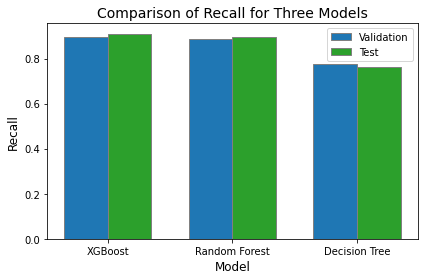

In [102]:
# Extract the recall values for each model
xgb_val_recall = df_full_confusion_table.loc['Average Validation Recall',
                                             'XGBoost Results']
xgb_test_recall = df_full_confusion_table.loc['Test Recall', 'XGBoost Results']
rf_val_recall = df_full_confusion_table.loc['Average Validation Recall',
                                            'Random Forest Results']
rf_test_recall = df_full_confusion_table.loc['Test Recall',
                                             'Random Forest Results']
dt_val_recall = df_full_confusion_table.loc['Average Validation Recall',
                                            'Decision Tree Results']
dt_test_recall = df_full_confusion_table.loc['Test Recall',
                                             'Decision Tree Results']

# Create a bar chart
models = ['XGBoost', 'Random Forest', 'Decision Tree']
val_recalls = [xgb_val_recall, rf_val_recall, dt_val_recall]
test_recalls = [xgb_test_recall, rf_test_recall, dt_test_recall]
bar_width = 0.35
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]

fig, ax = plt.subplots()
ax.bar(r1, val_recalls, color='#1f77b4', width=bar_width,
       edgecolor='grey', label='Validation')
ax.bar(r2, test_recalls, color='#2ca02c',
       width=bar_width, edgecolor='grey', label='Test')

# Set chart title and axis labels
ax.set_title('Comparison of Recall for Three Models', fontsize=14)
ax.set_xlabel('Model', fontsize=12)
ax.set_ylabel('Recall', fontsize=12)
ax.set_xticks([r + bar_width/2 for r in range(len(models))])
ax.set_xticklabels(models, fontsize=11)

# Set axis tick font size
ax.tick_params(axis='both', which='major', labelsize=10)

# Add legend
ax.legend(fontsize=10)

# Adjust figure padding
fig.tight_layout()

# Display the chart
plt.show();


In [103]:
# File Output
three_recall_bar_chart_name = 'three_models_recall_bar_chart.png'
three_recall_bar_chart_file_path = 'Data/Data_visualization_folders/modelling_results/' + \
    three_recall_bar_chart_name
if os.path.exists(three_recall_bar_chart_name):
    os.remove(three_recall_bar_chart_name)
    # Save the plot to a file
    fig.savefig(three_recall_bar_chart_file_path, dpi=300, bbox_inches='tight')
else:
    # Save the plot to a file
    fig.savefig(three_recall_bar_chart_file_path, dpi=300, bbox_inches='tight')

#### [BAR CHART: Compare average validation and test ‘F1-score’ for 3 models]

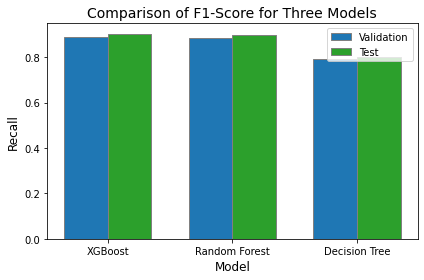

In [104]:
# Extract the recall values for each model
xgb_val_recall = df_full_confusion_table.loc['Average Validation F1',
                                             'XGBoost Results']
xgb_test_recall = df_full_confusion_table.loc['Test F1', 'XGBoost Results']
rf_val_recall = df_full_confusion_table.loc['Average Validation F1',
                                            'Random Forest Results']
rf_test_recall = df_full_confusion_table.loc['Test F1',
                                             'Random Forest Results']
dt_val_recall = df_full_confusion_table.loc['Average Validation F1',
                                            'Decision Tree Results']
dt_test_recall = df_full_confusion_table.loc['Test F1',
                                             'Decision Tree Results']

# Create a bar chart
models = ['XGBoost', 'Random Forest', 'Decision Tree']
val_recalls = [xgb_val_recall, rf_val_recall, dt_val_recall]
test_recalls = [xgb_test_recall, rf_test_recall, dt_test_recall]
bar_width = 0.35
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]

fig, ax = plt.subplots()
ax.bar(r1, val_recalls, color='#1f77b4', width=bar_width,
       edgecolor='grey', label='Validation')
ax.bar(r2, test_recalls, color='#2ca02c',
       width=bar_width, edgecolor='grey', label='Test')

# Set chart title and axis labels
ax.set_title('Comparison of F1-Score for Three Models', fontsize=14)
ax.set_xlabel('Model', fontsize=12)
ax.set_ylabel('Recall', fontsize=12)
ax.set_xticks([r + bar_width/2 for r in range(len(models))])
ax.set_xticklabels(models, fontsize=11)

# Set axis tick font size
ax.tick_params(axis='both', which='major', labelsize=10)

# Add legend
ax.legend(fontsize=10)

# Adjust figure padding
fig.tight_layout()

# Display the chart
plt.show();

In [105]:
# File Output
three_f1_bar_chart_name = 'three_models_f1_bar_chart.png'
three_f1_bar_chart_file_path = 'Data/Data_visualization_folders/modelling_results/' + \
    three_f1_bar_chart_name
if os.path.exists(three_f1_bar_chart_name):
    os.remove(three_f1_bar_chart_name)
    # Save the plot to a file
    fig.savefig(three_f1_bar_chart_file_path, dpi=300, bbox_inches='tight')
else:
    # Save the plot to a file
    fig.savefig(three_f1_bar_chart_file_path, dpi=300, bbox_inches='tight')

#### [ROC-AUC (One vs Rest) CURVE: Compare the ROC-AUC curve for each model]

In [106]:
dt_roc = pd.read_csv(
    'Data/Data_visualization_folders/modelling_results/dt_roc.csv', index_col=0)
rfc_roc = pd.read_csv(
    'Data/Data_visualization_folders/modelling_results/rfc_roc.csv', index_col=0)
xgb_roc = pd.read_csv(
    'Data/Data_visualization_folders/modelling_results/xgb_roc.csv', index_col=0)

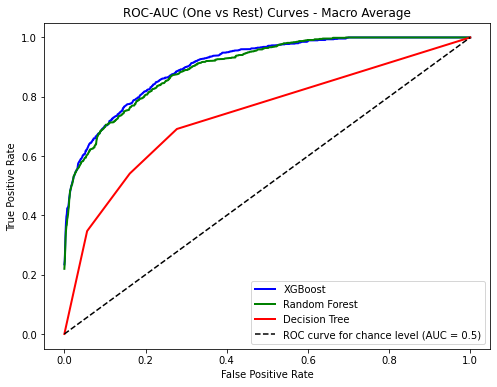

In [107]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot ROC curves for three models
plt.plot(xgb_roc["XGBoost False Positive Rate"], xgb_roc["XGBoost True Positive Rate"],
         label="XGBoost", color="blue", linewidth=2)
plt.plot(rfc_roc["Random Forest False Positive Rate"], rfc_roc["Random Forest True Positive Rate"],
         label="Random Forest", color="green", linewidth=2)
plt.plot(dt_roc["Decision Tree False Positive Rate"], dt_roc["Decision Tree True Positive Rate"],
         label="Decision Tree", color="red", linewidth=2)

# Plot ROC curve for chance level
plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")

# Set plot title and axis labels
plt.title("ROC-AUC (One vs Rest) Curves - Macro Average")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

# Add legend
plt.legend()

# Display the plot
plt.show();


In [108]:
# File Output
three_roc_file_name = 'three_roc_curve.png'
three_roc_file_path = 'Data/Data_visualization_folders/modelling_results/' + \
    three_roc_file_name
if os.path.exists(three_roc_file_name):
    os.remove(three_roc_file_name)
    # Save the plot to a file
    fig.savefig(three_roc_file_path, dpi=300, bbox_inches='tight')
else:
    # Save the plot to a file
    fig.savefig(three_roc_file_path, dpi=300, bbox_inches='tight')

#### [XGBoost - MAP (HEAT MAP): Percentage of mislabeled fire-risk for ‘TEST’ months per grid ]

In [109]:
df_xgb_test_combined = pd.read_csv('Data/Data_visualization_folders/modelling_results/xgb_test_combined.csv', index_col=0)

In [110]:
df_xgb_test_combined_count = df_xgb_test_combined.groupby('1000_GRID_ID')[
    'COMPARAISON_FIRE_RISK_1_MONTH_FORWARD_SHIFT'].count().reset_index(name='TOTAL_COUNT')
df_xgb_test_combined_false_counts = df_xgb_test_combined.groupby('1000_GRID_ID')[
    'COMPARAISON_FIRE_RISK_1_MONTH_FORWARD_SHIFT'].apply(lambda x: (x == False).sum()).reset_index(name='FALSE_COUNT')
df_xgb_test_combined_false_percents = pd.merge(
    df_xgb_test_combined_false_counts, df_xgb_test_combined_count, on='1000_GRID_ID')
df_xgb_test_combined_false_percents['FALSE_PERCENT'] = df_xgb_test_combined_false_percents['FALSE_COUNT'] / \
    df_xgb_test_combined_false_percents['TOTAL_COUNT'] * 100

In [111]:
df_xgb_test_combined_false_percents.describe(include='all')

,1000_GRID_ID,FALSE_COUNT,TOTAL_COUNT,FALSE_PERCENT
count,714,714.000000,714.0,714.000000
unique,714,NaN,NaN,NaN
top,eZk6XrHE1zw=,NaN,NaN,NaN
freq,1,NaN,NaN,NaN
mean,NaN,0.448179,5.0,8.963585
std,NaN,0.812406,0.0,16.248122
min,NaN,0.000000,5.0,0.000000
25%,NaN,0.000000,5.0,0.000000
50%,NaN,0.000000,5.0,0.000000
75%,NaN,1.000000,5.0,20.000000


In [112]:
merged_df_xgb_test_combined_false_percents = gdf.merge(df_xgb_test_combined_false_percents,
                                          left_on='grid_id', right_on='1000_GRID_ID')

In [113]:
merged_df_xgb_test_combined_false_percents.to_file('Data/Data_visualization_folders/modelling_results/merged_df_xgb_test_combined_false_percents.shp',
                                      driver='ESRI Shapefile', encoding='utf-8')

<ipython-input-113-e86346faf7b0>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  merged_df_xgb_test_combined_false_percents.to_file('Data/Data_visualization_folders/modelling_results/merged_df_xgb_test_combined_false_percents.shp',


#### [Random Forest - MAP (HEAT MAP): Percentage of mislabeled fire-risk for ‘TEST’ months per grid ]

In [114]:
df_rfc_test_combined = pd.read_csv(
    'Data/Data_visualization_folders/modelling_results/rfc_test_combined.csv', index_col=0)

In [115]:
df_rfc_test_combined_count = df_rfc_test_combined.groupby('1000_GRID_ID')[
    'COMPARAISON_FIRE_RISK_1_MONTH_FORWARD_SHIFT'].count().reset_index(name='TOTAL_COUNT')
df_rfc_test_combined_false_counts = df_rfc_test_combined.groupby('1000_GRID_ID')[
    'COMPARAISON_FIRE_RISK_1_MONTH_FORWARD_SHIFT'].apply(lambda x: (x == False).sum()).reset_index(name='FALSE_COUNT')
df_rfc_test_combined_false_percents = pd.merge(
    df_rfc_test_combined_false_counts, df_rfc_test_combined_count, on='1000_GRID_ID')
df_rfc_test_combined_false_percents['FALSE_PERCENT'] = df_rfc_test_combined_false_percents['FALSE_COUNT'] / \
    df_rfc_test_combined_false_percents['TOTAL_COUNT'] * 100

In [116]:
df_rfc_test_combined_false_percents.describe(include='all')

,1000_GRID_ID,FALSE_COUNT,TOTAL_COUNT,FALSE_PERCENT
count,714,714.000000,714.0,714.000000
unique,714,NaN,NaN,NaN
top,eZk6XrHE1zw=,NaN,NaN,NaN
freq,1,NaN,NaN,NaN
mean,NaN,0.521008,5.0,10.420168
std,NaN,0.935647,0.0,18.712932
min,NaN,0.000000,5.0,0.000000
25%,NaN,0.000000,5.0,0.000000
50%,NaN,0.000000,5.0,0.000000
75%,NaN,1.000000,5.0,20.000000


In [117]:
merged_df_rfc_test_combined_false_percents = gdf.merge(df_rfc_test_combined_false_percents,
                                                       left_on='grid_id', right_on='1000_GRID_ID')

In [118]:
merged_df_rfc_test_combined_false_percents.to_file('Data/Data_visualization_folders/modelling_results/merged_df_rfc_test_combined_false_percents.shp',
                                                   driver='ESRI Shapefile', encoding='utf-8')

<ipython-input-118-c7990cd36c4e>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  merged_df_rfc_test_combined_false_percents.to_file('Data/Data_visualization_folders/modelling_results/merged_df_rfc_test_combined_false_percents.shp',


#### [Decision Tree - MAP (HEAT MAP): Percentage of mislabeled fire-risk for ‘TEST’ months per grid]

In [119]:
df_dt_test_combined = pd.read_csv(
    'Data/Data_visualization_folders/modelling_results/dt_test_combined.csv', index_col=0)

In [120]:
df_dt_test_combined_count = df_dt_test_combined.groupby('1000_GRID_ID')[
    'COMPARAISON_FIRE_RISK_1_MONTH_FORWARD_SHIFT'].count().reset_index(name='TOTAL_COUNT')
df_dt_test_combined_false_counts = df_dt_test_combined.groupby('1000_GRID_ID')[
    'COMPARAISON_FIRE_RISK_1_MONTH_FORWARD_SHIFT'].apply(lambda x: (x == False).sum()).reset_index(name='FALSE_COUNT')
df_dt_test_combined_false_percents = pd.merge(
    df_dt_test_combined_false_counts, df_dt_test_combined_count, on='1000_GRID_ID')
df_dt_test_combined_false_percents['FALSE_PERCENT'] = df_dt_test_combined_false_percents['FALSE_COUNT'] / \
    df_dt_test_combined_false_percents['TOTAL_COUNT'] * 100

In [121]:
df_dt_test_combined_false_percents.describe(include='all')

,1000_GRID_ID,FALSE_COUNT,TOTAL_COUNT,FALSE_PERCENT
count,714,714.000000,714.0,714.000000
unique,714,NaN,NaN,NaN
top,eZk6XrHE1zw=,NaN,NaN,NaN
freq,1,NaN,NaN,NaN
mean,NaN,1.177871,5.0,23.557423
std,NaN,1.152113,0.0,23.042255
min,NaN,0.000000,5.0,0.000000
25%,NaN,0.000000,5.0,0.000000
50%,NaN,1.000000,5.0,20.000000
75%,NaN,2.000000,5.0,40.000000


In [122]:
merged_df_dt_test_combined_false_percents = gdf.merge(df_dt_test_combined_false_percents,
                                                       left_on='grid_id', right_on='1000_GRID_ID')

In [123]:
merged_df_dt_test_combined_false_percents.to_file('Data/Data_visualization_folders/modelling_results/merged_df_dt_test_combined_false_percents.shp',
                                                   driver='ESRI Shapefile', encoding='utf-8')

<ipython-input-123-7824e7349277>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  merged_df_dt_test_combined_false_percents.to_file('Data/Data_visualization_folders/modelling_results/merged_df_dt_test_combined_false_percents.shp',
